## Importando as bibliotecas 

In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import seaborn as sns

## Carregando a base de dados 

In [4]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [60]:
dados[['Renda']].describe()

,Renda
count,76840.000000
mean,2000.383199
std,3323.387730
min,0.000000
25%,788.000000
50%,1200.000000
75%,2000.000000
max,200000.000000


### Alimentando as variaveis 

In [25]:
cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [32]:
sexo = {0 : 'Masculino', 1: 'Feminino'}

In [20]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [21]:
labels = ['E', 'D', 'C', 'B', 'A']

In [36]:
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}

In [71]:
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

## Quantidade e porcentagem de gêneros da base de dados 

In [81]:
pocentagem_sexo = dados.Sexo.value_counts(normalize = True) * 100
pocentagem_sexo = pocentagem.round(2)

In [82]:
freq_sexo = dados.Sexo.value_counts()

In [83]:
df_por_freq = pd.DataFrame({'Frequencia ': freq_sexo, 'Porcentagem (%) ': pocentagem_sexo})

In [84]:
df_por_freq

,Frequencia,Porcentagem (%)
0,53250,69.3
1,23590,30.7


In [85]:
df_por_freq.rename(index  = sexo, inplace = True)
df_por_freq.rename_axis('Sexo',axis = 'columns', inplace = True)

In [86]:
df_por_freq

Sexo,Frequencia,Porcentagem (%)
Masculino,53250,69.3
Feminino,23590,30.7


## Quantidade de gêneros e cor da base de dados

In [87]:
frequencia_cor = pd.crosstab(dados.Sexo,
                         dados.Cor
                        )
frequencia_cor.rename(index  = {0 : 'Masculino', 1: 'Feminino'}, inplace = True)
frequencia_cor.rename(columns = cor, inplace = True)
frequencia_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


## Quantidade e porcentagem de classes da base de dados 

In [18]:
dados.Renda.min()

0

In [19]:
dados.Renda.max()

200000

In [151]:
frequencia_classe = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True))

frequencia_classe

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [90]:
percent_classe = round(pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True),normalize = True ) * 100,1)

percent_classe

E    64.8
D    21.7
C     9.9
B     2.8
A     0.8
Name: Renda, dtype: float64

In [91]:
df2_por_freq = pd.DataFrame({'Frequencia ': frequencia_classe, 'Porcentagem (%) ': percent_classe})
df2_por_freq.sort_index(ascending = False)

,Frequencia,Porcentagem (%)
A,608,0.8
B,2178,2.8
C,7599,9.9
D,16700,21.7
E,49755,64.8


## Renda por sexo 

<AxesSubplot:title={'center':'Renda por Sexo'}, xlabel='R$', ylabel='Sexo'>

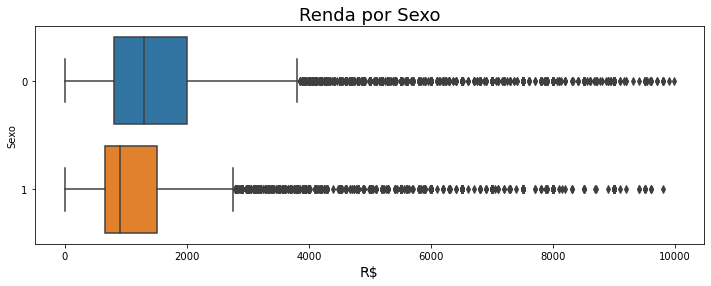

In [27]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda por Sexo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

## Anos de estudos por sexo

<AxesSubplot:title={'center':'Anos de Estudos por Sexo'}, xlabel='Tempo de Estudo', ylabel='Sexo'>

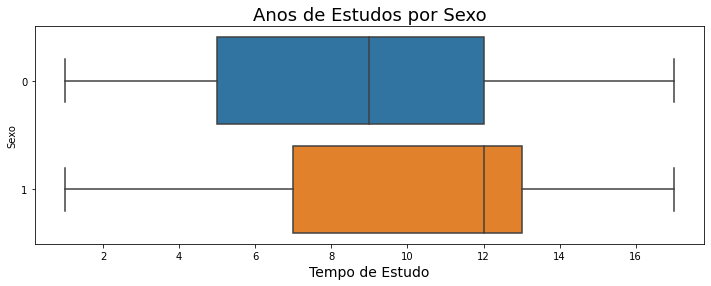

In [146]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudos por Sexo', fontsize=18)
ax.set_xlabel('Tempo de Estudo', fontsize=14)
ax

## Analise geral de renda por cor e sexo

In [92]:
frequencia_cor = pd.crosstab(np.mean(dados.Renda),
                         dados.Cor)

frequencia_cor.rename(index  = {0 : 'Renda'}, inplace = True)
frequencia_cor.rename(columns = cor, inplace = True)
frequencia_cor = frequencia_cor.reset_index()
frequencia_cor

Cor,row_0,Indígena,Branca,Preta,Amarela,Parda
0,2000.383199,357,31815,8391,352,35925


In [61]:
renda_estatisticas_por_sexo_e_cor = pd.crosstab(dados.Cor, 
                                                dados.Sexo, 
                                                values = dados.Renda, 
                                                aggfunc = {'mean', 'median', 'max','std','sum'})
renda_estatisticas_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_estatisticas_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_e_cor

max                   mean                 median           \
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino   
Cor                                                                         
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0   
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0   
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0   
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0   
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0   

                  std                       sum              
Sexo        Masculino      Feminino   Masculino    Feminino  
Cor                                                          
Indígena  1204.093490  11957.498292    276918.0    248903.0  
Branca    4750.791872   3251.013154  64933972.0  20299028.0  
Preta     1936.309271   1349.799809   8824447.0   3277849.0  
Amarela   5740.824820   3731.173660   1118189.0    354199.0  
Parda     2312.087184   1596.233048  41593989.0  12781951.0

## Analise geral de renda por anos de estudos e sexo

In [69]:
renda_estatisticas_por_sexo_e_estudo = pd.crosstab(dados['Anos de Estudo'], 
                                                   dados.Sexo,
                                                   aggfunc = {'mean', 'median', 'max', 'std','sum'},
                                                   values = dados.Renda).round(2)
renda_estatisticas_por_sexo_e_estudo.rename(index = anos_de_estudo, inplace = True)
renda_estatisticas_por_sexo_e_estudo.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_e_estudo

max                mean           \
Sexo                           Masculino  Feminino Masculino Feminino   
Anos de Estudo                                                          
Sem instrução e menos de 1 ano   30000.0   10000.0    799.49   516.20   
1 ano                            30000.0    2000.0    895.63   492.77   
2 anos                           40000.0    4000.0    931.18   529.91   
3 anos                           80000.0    3500.0   1109.20   546.85   
4 anos                           50000.0   10000.0   1302.33   704.28   
5 anos                           35000.0    8000.0   1338.65   781.39   
6 anos                           25000.0    6000.0   1448.88   833.73   
7 anos                           40000.0    9000.0   1465.50   830.75   
8 anos                           30000.0   18000.0   1639.40   933.62   
9 anos                           60000.0   20000.0   1508.04   868.02   
10 anos                          45000.0    6000.0   1731.27   925.92   
11 anos                         200000.0  100000.0   2117.06  1286.79   
12 anos                          30000.0  120000.0   2470.33  1682.31   
13 anos                          25000.0   20000.0   3195.10  1911.73   
14 anos                          50000.0   20000.0   3706.62  2226.46   
15 anos ou mais                 200000.0  100000.0   6134.28  3899.51   
Não determinados                  7000.0    3000.0   1295.76   798.17   

                                  median                std           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31   
1 ano                              788.0    400.0   1331.95   425.29   
2 anos                             788.0    450.0   1435.17   498.23   
3 anos                             800.0    500.0   2143.80   424.12   
4 anos                            1000.0    788.0   1419.82   629.55   
5 anos                            1045.0    788.0   1484.65   635.78   
6 anos                            1200.0    788.0   1476.63   574.55   
7 anos                            1200.0    788.0   1419.71   602.04   
8 anos                            1300.0    800.0   1515.58   896.78   
9 anos                            1200.0    788.0   2137.66   973.22   
10 anos                           1218.0    800.0   2078.61   620.61   
11 anos                           1500.0   1000.0   2676.54  1819.04   
12 anos                           1800.0   1200.0   2268.08  4851.83   
13 anos                           2400.0   1300.0   2797.12  2053.79   
14 anos                           2500.0   1600.0   3987.21  2064.08   
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77   
Não determinados                  1200.0    788.0    979.65   459.99   

                                       sum              
Sexo                             Masculino    Feminino  
Anos de Estudo                                          
Sem instrução e menos de 1 ano   3578538.0    708745.0  
1 ano                             968175.0    151281.0  
2 anos                           1524340.0    245879.0  
3 anos                           2470197.0    363111.0  
4 anos                           6537693.0   1203613.0  
5 anos                           4346607.0    978300.0  
6 anos                           2593487.0    546095.0  
7 anos                           2845997.0    620571.0  
8 anos                           9344561.0   2128643.0  
9 anos                           1940846.0    480016.0  
10 anos                          2595175.0    573144.0  
11 anos                         29497004.0   8898159.0  
12 anos                          2897698.0   1115374.0  
13 anos                          2642347.0    814397.0  
14 anos                          3035722.0   1266856.0  
15 anos ou mais                 39793073.0  16799103.0  
Não determinados                  136055.0     68643

<AxesSubplot:title={'center':'RENDA por ANOS DE ESTUDOS'}, xlabel='Tempo de Estudos', ylabel='Renda'>

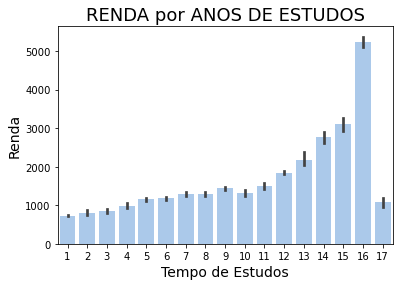

In [148]:
ax = sns.barplot(x="Anos de Estudo", y="Renda", data=dados,
          color="b")

ax.set_title('RENDA por ANOS DE ESTUDOS', fontsize=18) 
ax.set_xlabel('Tempo de Estudos', fontsize=14) 
ax.set_ylabel('Renda', fontsize=14) 
ax

## Renda por estado

<AxesSubplot:title={'center':'RENDA por ESTADOS'}, xlabel='R$', ylabel='Estados'>

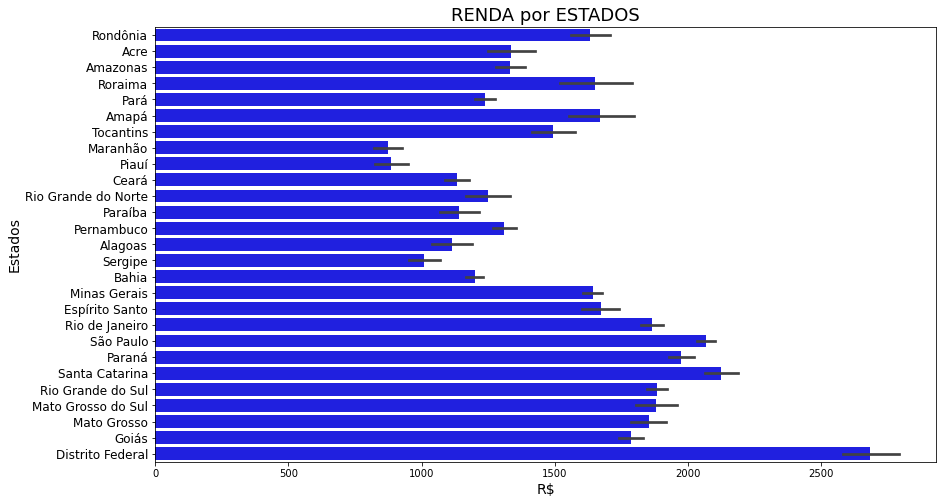

In [143]:
ax = sns.barplot(x = 'Renda', y = 'UF', data=dados.query('Renda < 10000'), orient='h', color = 'Blue')

ax.figure.set_size_inches(14, 8)  

ax.set_title('RENDA por ESTADOS', fontsize=18) 
ax.set_xlabel('R$', fontsize=14) 

ax.set_ylabel('Estados', fontsize=14)  
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    
ax 

## Anos de estudos por estado

<AxesSubplot:title={'center':'ESTUDOS por ESTADOS'}, xlabel='Tempo de Estudo', ylabel='Estados'>

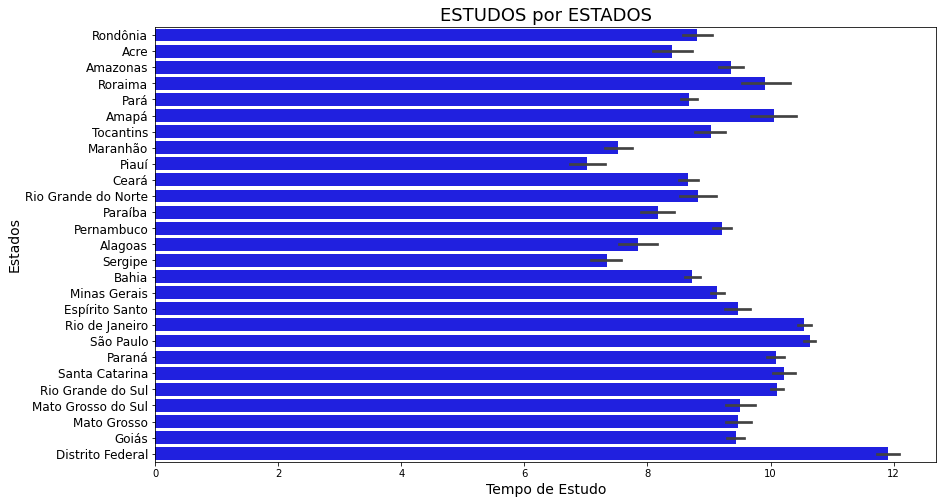

In [147]:
ax = sns.barplot(x = 'Anos de Estudo', y = 'UF', data=dados, orient='h', color = 'Blue')

ax.figure.set_size_inches(14, 8)  

ax.set_title('ESTUDOS por ESTADOS', fontsize=18) 
ax.set_xlabel('Tempo de Estudo', fontsize=14) 

ax.set_ylabel('Estados', fontsize=14)  
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    
ax 

______________________________________________________________________________________________________

# CONCLUSÃO 

Após uma extensa análise e pesquisa dos dados coletados, destacamos alguns insights cruciais. A predominância na base de dados é de indivíduos do sexo masculino, pertencentes à classe E, representando aproximadamente 65%. Observa-se uma desigualdade de gênero, pois os homens tendem a apresentar uma renda superior, mesmo quando as mulheres possuem um nível de educação mais elevado em comparação aos homens.
Esta desigualdade é evidenciada ao constatar que um maior tempo de estudo está associado a uma renda mais elevada. Além disso, notamos que os níveis de renda e anos de estudo estão mais concentrados em estados mais populosos e de maior porte, como Distrito Federal, São Paulo e Rio de Janeiro.
A análise revela, como aprendizado significativo, a existência de desigualdade de gênero e sociais, bem como uma carência de suporte para estados menos favorecidos no país. Considerando a forte correlação entre tempo de estudo e renda, seria pertinente que o governo promovesse iniciativas educacionais mais robustas em estados menos desenvolvidos e em classes sociais mais vulneráveis, e buscar corrigir as discrepâncias salariais entre homens e mulheres.
